### 주가예측 Stocker 라이브러리  

- 깃헙(설치안내)  https://github.com/WillKoehrsen/Data-Analysis/tree/master/stocker
- 깃헙(설명자료-기초) https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/Stocker%20Analysis%20Usage.ipynb
- 깃헙(설명자료-예측) https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/Stocker%20Prediction%20Usage.ipynb
- 블로그 설명자료(한글번역) https://blog.funhnc.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%ED%95%98%EB%8A%94-%EC%A3%BC%EC%8B%9D-%EC%98%88%EC%B8%A1
- 블로그 설명자료(영어원문) https://towardsdatascience.com/stock-prediction-in-python-b66555171a2    

In [1]:
'''
필수 라이브러리 설치 
!pip install -U quandl numpy pandas fbprophet matplotlib pytrends pystan
또는 
!conda install quandl numpy pandas matplotlib pystan

중요!!! 
https://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/stocker.py 파일을 다운받아서 로컬에 저장
'''

'\n필수 라이브러리 설치 \n!pip install -U quandl numpy pandas fbprophet matplotlib pytrends pystan\n또는 \n!conda install quandl numpy pandas matplotlib pystan\n\n중요!!! \nhttps://github.com/WillKoehrsen/Data-Analysis/blob/master/stocker/stocker.py 파일을 다운받아서 로컬에 저장\n'

In [2]:
from stocker import Stocker

import warnings
warnings.filterwarnings("ignore")

In [3]:
amazon = Stocker('AMZN')

AMZN Stocker Initialized. Data covers 1997-05-16 to 2018-03-27.


In [4]:
stock_history = amazon.stock
stock_history.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
5243,2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291.0,0.0,1.0,1586.45,1590.00,1563.17,1581.86,4667291.0,2018-03-21,1581.86,-4.59
5244,2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737.0,0.0,1.0,1565.47,1573.85,1542.40,1544.10,6177737.0,2018-03-22,1544.10,-21.37
5245,2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966.0,0.0,1.0,1539.01,1549.02,1495.36,1495.56,7843966.0,2018-03-23,1495.56,-43.45
5246,2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618.0,0.0,1.0,1530.00,1556.99,1499.25,1555.86,5547618.0,2018-03-26,1555.86,25.86
5247,2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279.0,0.0,1.0,1572.40,1575.96,1482.32,1497.05,6793279.0,2018-03-27,1497.05,-75.35


Maximum Adj. Close = 1598.39 on 2018-03-12.
Minimum Adj. Close = 1.40 on 1997-05-22.
Current Adj. Close = 1497.05 on 2018-03-27.



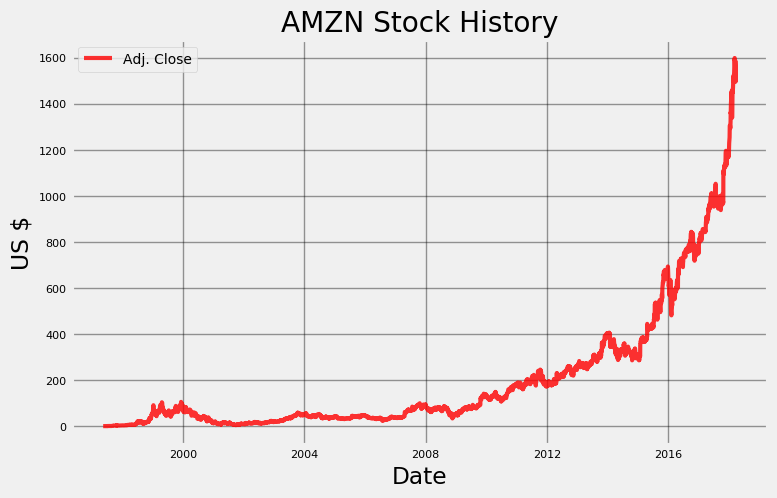

In [5]:
amazon.plot_stock()

Maximum Daily Change = 81.38 on 2018-02-06.
Minimum Daily Change = -79.20 on 2018-02-08.
Current Daily Change = -75.35 on 2018-03-27.



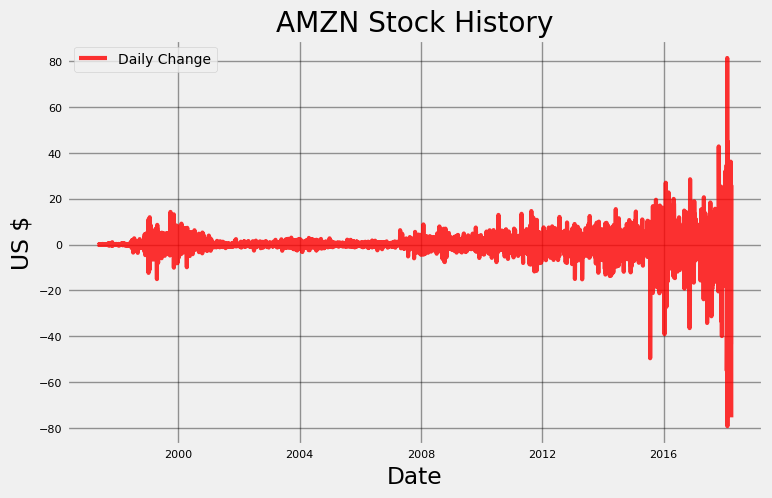

In [6]:
amazon.plot_stock(stats=['Daily Change'])

Facebook에서 개발한 addictive 모델 prophet 패키지 사용

Predicted Price on 2018-06-25 = $1882.69


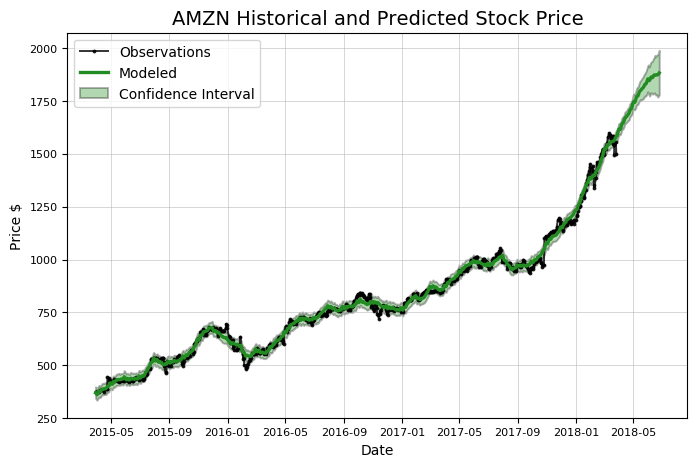

In [7]:
# prdict days into the future
model, model_data = amazon.create_prophet_model(days=90)

예측 평가


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $1063.08.
Actual price on    2018-03-23 = $1495.56.

Average Absolute Error on Training Data = $16.27.
Average Absolute Error on Testing  Data = $135.92.

When the model predicted an increase, the price increased 57.76% of the time.
When the model predicted a  decrease, the price decreased  42.53% of the time.

The actual value was within the 80% confidence interval 63.05% of the time.


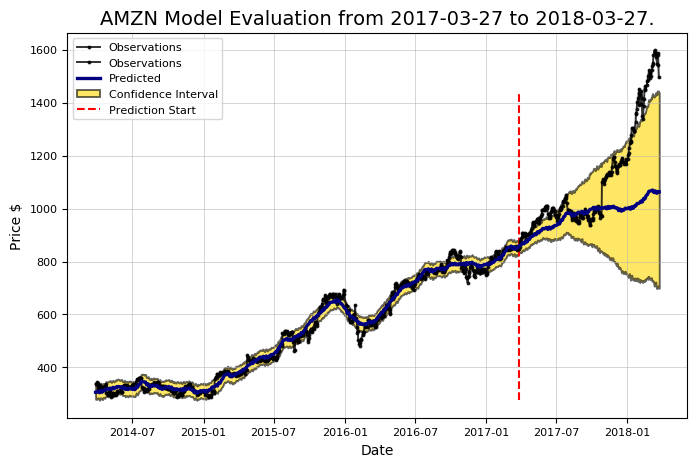

In [8]:
amazon.evaluate_prediction()

변경점 사전 선택

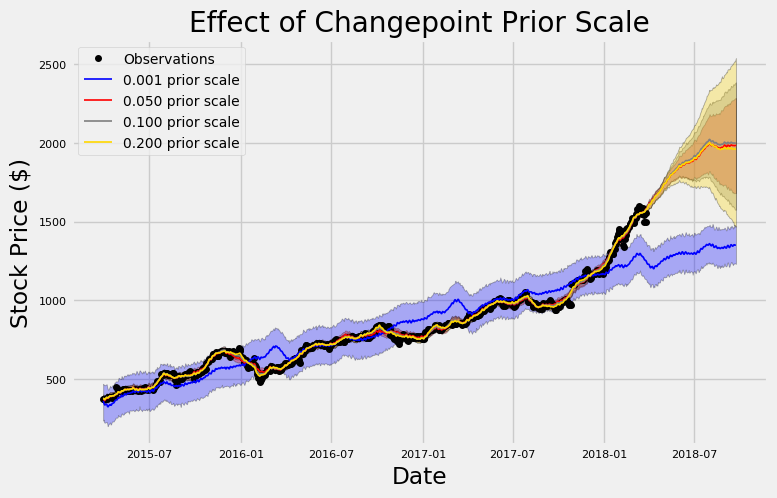

In [9]:
# changepoint priors is the list of changepoints to evaluate
amazon.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 to 2017-01-03.

     cps  train_err  train_range    test_err  test_range
0  0.001  44.476286   152.930744  149.378762  153.041884
1  0.050  11.225187    35.888386  148.769640  142.615652
2  0.100  10.710383    34.625696  149.751968  174.433747
3  0.200   9.810689    32.178065  126.039086  311.885142


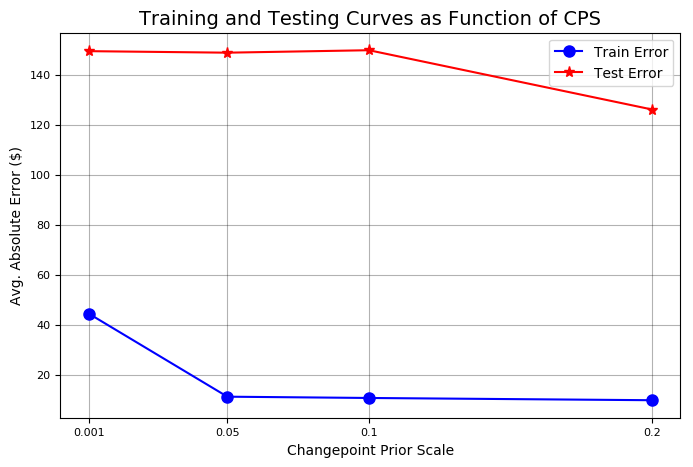

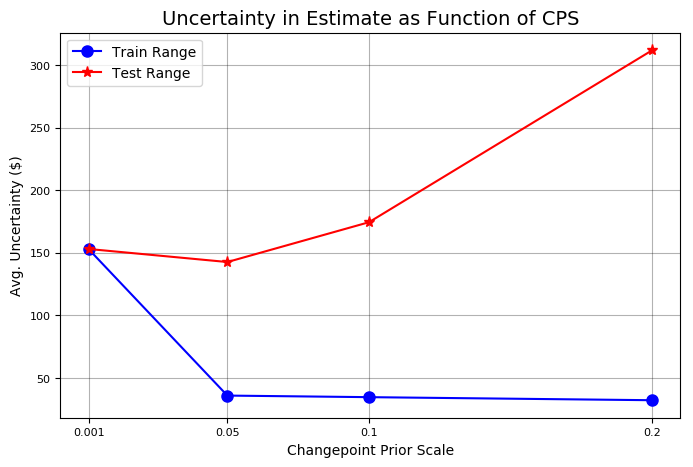

In [10]:
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 to 2017-01-03.

    cps  train_err  train_range    test_err   test_range
0  0.15  10.349379    33.587459  146.166050   218.672475
1  0.20   9.810689    32.160843  126.039086   310.083972
2  0.25   9.378231    30.908678  110.433461   441.638126
3  0.40   8.569736    28.825820   72.118846   802.021060
4  0.50   8.359124    28.323692   74.421845   898.677796
5  0.60   8.267228    28.005823   77.989126  1013.582956


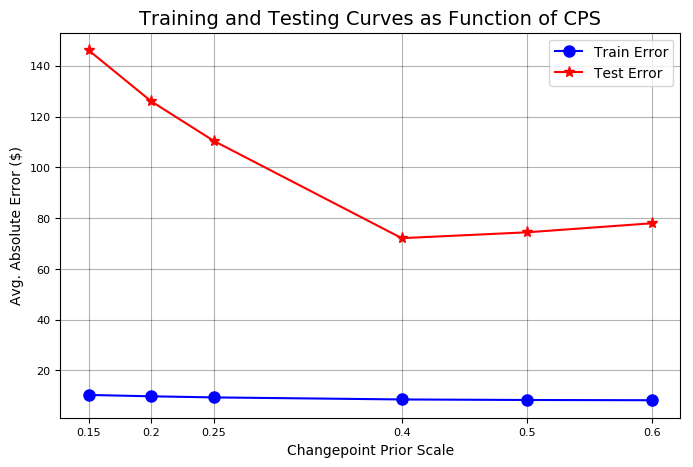

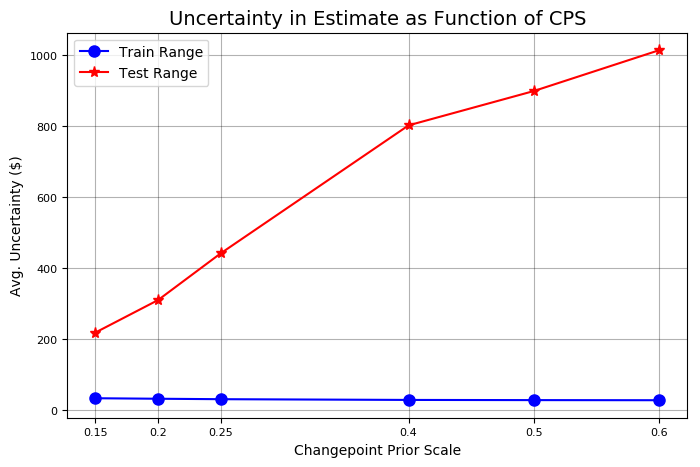

In [11]:
# test more efficient changepoint priors on same validation range
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.15, 0.2, 0.25, 0.4, 0.5, 0.6])

stocker 객체의 changepoint prior 속성 설정

In [12]:
amazon.changepoint_prior_scale = 0.5

정제된 모델 평가


Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $1002.10.
Actual price on    2018-03-23 = $1495.56.

Average Absolute Error on Training Data = $10.89.
Average Absolute Error on Testing  Data = $175.86.

When the model predicted an increase, the price increased 59.73% of the time.
When the model predicted a  decrease, the price decreased  45.45% of the time.

The actual value was within the 80% confidence interval 87.15% of the time.


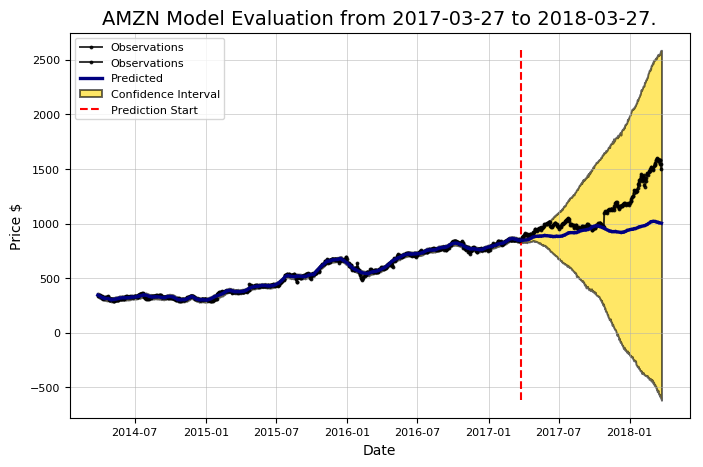

In [13]:
amazon.evaluate_prediction()

주식 시장에서 실행하기

You played the stock market in AMZN from 2017-03-27 to 2018-03-27 with 1000 shares.

When the model predicted an increase, the price increased 59.73% of the time.
When the model predicted a  decrease, the price decreased  45.45% of the time.

The total profit using the Prophet model = $509070.00.
The Buy and Hold strategy profit =         $648740.00.

Thanks for playing the stock market!



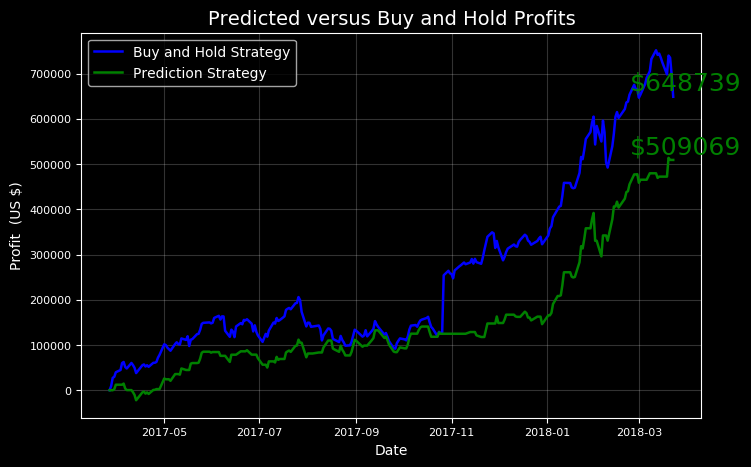

In [14]:
# Going Big
amazon.evaluate_prediction(nshares=1000)

미래 예측


Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1574.948753   2.154921  1594.563067  1553.468468
2  2018-03-29  1578.748214   3.799462  1600.135681  1556.894188
3  2018-03-30  1585.219202   6.470988  1606.466298  1563.378695
5  2018-04-01  1598.345488  13.126286  1618.006466  1575.894270
6  2018-04-02  1600.180343   1.834854  1621.061295  1579.699695
8  2018-04-04  1599.965233   0.379895  1621.045032  1576.483800
9  2018-04-05  1603.875570   3.910336  1624.931729  1580.322394
10 2018-04-06  1610.794270   6.918700  1632.636390  1586.682943

Predicted Decrease: 

        Date     estimate    change        upper        lower
7 2018-04-03  1599.585339 -0.595004  1621.336124  1577.307438


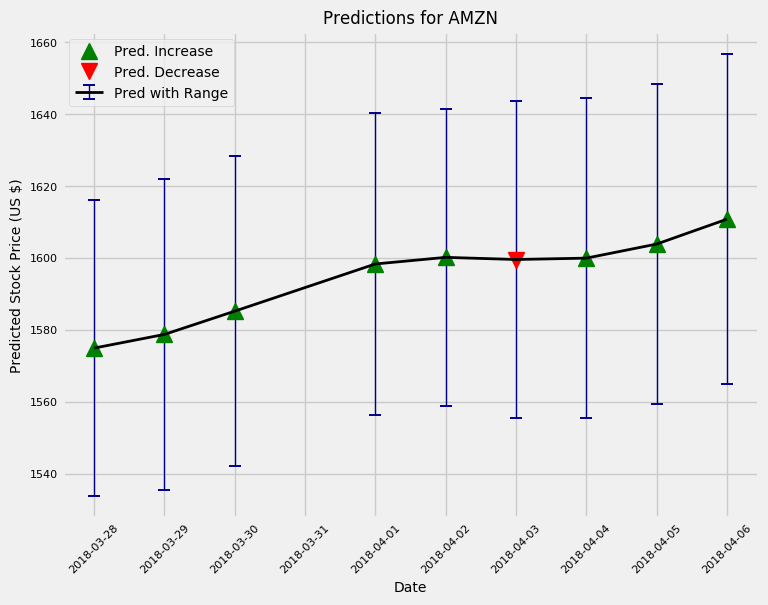


Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1574.948753   2.154921  1596.288189  1552.713334
2  2018-03-29  1578.748214   3.799462  1601.198916  1556.529149
3  2018-03-30  1585.219202   6.470988  1606.458337  1563.104514
5  2018-04-01  1598.345488  13.126286  1618.741739  1575.153402
6  2018-04-02  1600.180343   1.834854  1622.307069  1578.354452
8  2018-04-04  1599.965233   0.379895  1622.595638  1578.063853
9  2018-04-05  1603.875570   3.910336  1626.551662  1582.255064
10 2018-04-06  1610.794270   6.918700  1632.570078  1589.411314
12 2018-04-08  1621.759433  10.965164  1644.044412  1599.606762
13 2018-04-09  1623.065507   1.306073  1649.615173  1599.017546
14 2018-04-10  1624.220461   1.154954  1648.132680  1601.258611
15 2018-04-11  1627.903827   3.683366  1651.446376  1605.102608
16 2018-04-12  1634.313328   6.409501  1658.719573  1610.394291
17 2018-04-13  1641.024071   6.710743  1665.025593  1615.208580
19 2018-04-15  16

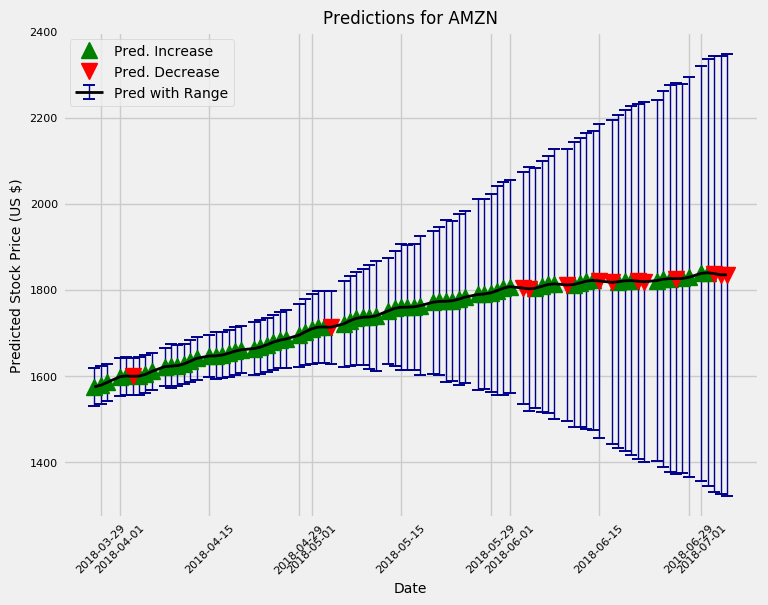

In [15]:
amazon.predict_future(days=10)
amazon.predict_future(days=100)